# Matplotlib으로 데이터 시각화하기

**데이터를 보기좋게 표현해봅시다.**

#### 1. Matplotlib 시작하기
   
#### 2. 자주 사용되는 Plotting의 Options
- 크기 : `figsize`
- 제목 : `title`
- 라벨 : `_label`
- 눈금 : `_tics`
- 범례 : `legend`
  
#### 3. Matplotlib Case Study
- 꺾은선 그래프 (Plot)
- 산점도 (Scatter Plot)
- 박스그림 (Box Plot)
- 막대그래프 (Bar Chart)
- 원형그래프 (Pie Chart)
  
#### 4. The 멋진 그래프, seaborn Case Study
- 커널밀도그림 (Kernel Density Plot)
- 카운트그림 (Count Plot)
- 캣그림 (Cat Plot)
- 스트립그림 (Strip Plot)
- 히트맵 (Heatmap)
  

## I. Matplotlib 시작하기


- 파이썬의 데이터 시각화 라이브러리
- `%matplotlib inline`을 통해서 활성화

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## II. Matplotlib Case Study with Arguments

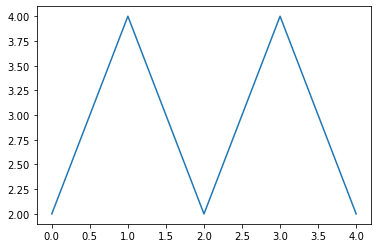

In [3]:
plt.plot([2, 4, 2, 4, 2]) # 실제 plotting을 하는 함수 y(value), x(index)
plt.show() # plt를 확인하는 명령

### Figsize : Figure(도면)의 크기 조절

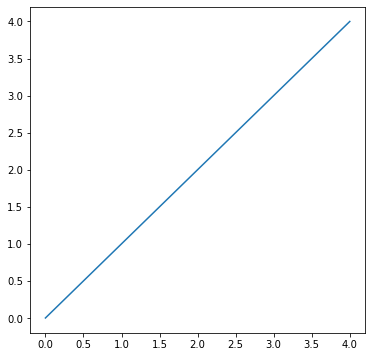

In [7]:
plt.figure(figsize=(6,6)) # plotting을 할 도면을 선언

plt.plot([0, 1, 2, 3, 4]) # 실제 plotting을 하는 함수 
plt.show()

### 2차함수 그래프 with plot()

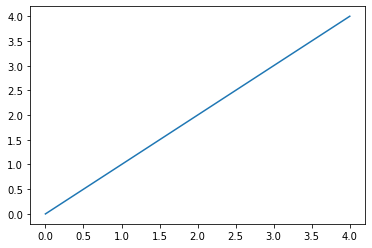

In [8]:
# 리스트를 이용해서 1차함수 y=x를 그려보면

plt.plot([0, 1, 2, 3, 4])
plt.show()

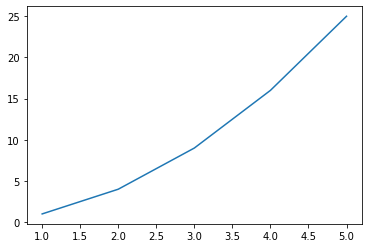

In [10]:
# np.array를 이용해서 함수 그래프 그리기
# y = x ^ 2

x = np.array([1, 2, 3, 4, 5]) # 정의역
y = np.array([1, 4, 9, 16, 25]) # f(x)

plt.plot(x, y)
plt.show()

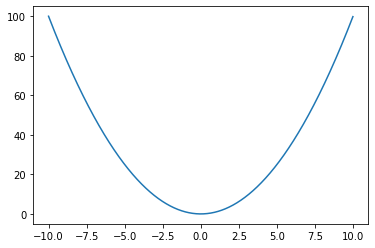

In [13]:
# np.arange(a, b, c)

x = np.arange(-10, 10, 0.01)
plt.plot(x, x**2)
plt.show()

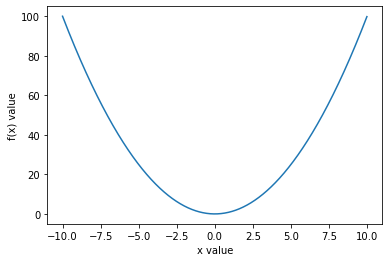

In [15]:
# x, y축에 설명 추가하기

x = np.arange(-10, 10, 0.01)

###
plt.xlabel('x value')
plt.ylabel('f(x) value')
###

plt.plot(x,x**2)
plt.show()

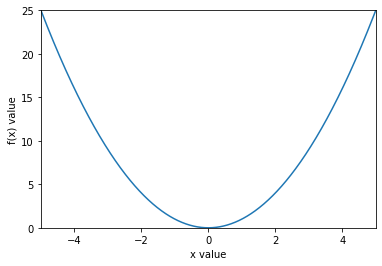

In [16]:
# x, y축의 범위를 설정하기

x = np.arange(-10, 10, 0.01)

plt.xlabel('x value')
plt.ylabel('f(x) value')

###
plt.axis([-5, 5, 0, 25]) # [x_min, x_max, y_min, y_max]
###

plt.plot(x,x**2)
plt.show()

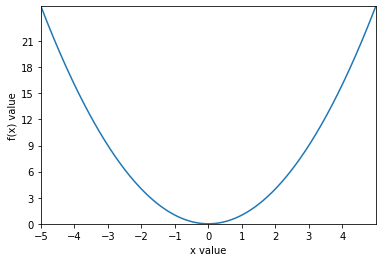

In [17]:
x = np.arange(-10, 10, 0.01)

plt.xlabel('x value')
plt.ylabel('f(x) value')

plt.axis([-5, 5, 0, 25]) # [x_min, x_max, y_min, y_max]

###
plt.xticks([i for i in range(-5, 5, 1)]) # x축의 눈금 설정, -5, -4, -3,..
plt.yticks([i for i in range(0, 24, 3)]) # y축의 눈금 설정
###

plt.plot(x,x**2)
plt.show()

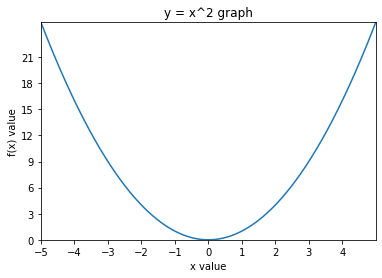

In [19]:
# 그래프에 title 달기

x = np.arange(-10, 10, 0.01)

plt.xlabel('x value')
plt.ylabel('f(x) value')

plt.axis([-5, 5, 0, 25]) # [x_min, x_max, y_min, y_max]

plt.xticks([i for i in range(-5, 5, 1)]) # x축의 눈금 설정, -5, -4, -3,..
plt.yticks([i for i in range(0, 24, 3)]) # y축의 눈금 설정

###
plt.title('y = x^2 graph')
###

plt.plot(x,x**2)
plt.show()

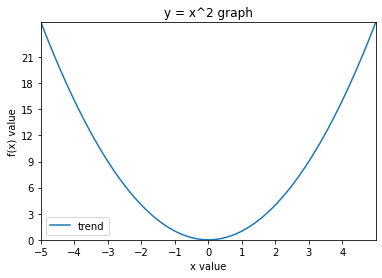

In [20]:
x = np.arange(-10, 10, 0.01)

plt.xlabel('x value')
plt.ylabel('f(x) value')

plt.axis([-5, 5, 0, 25]) # [x_min, x_max, y_min, y_max]

plt.xticks([i for i in range(-5, 5, 1)]) # x축의 눈금 설정, -5, -4, -3,..
plt.yticks([i for i in range(0, 24, 3)]) # y축의 눈금 설정

plt.title('y = x^2 graph')

plt.plot(x,x**2, label='trend')
plt.legend()
plt.show()

## III. Matplotlib Case Study

### 꺾은선 그래프 (Plot)

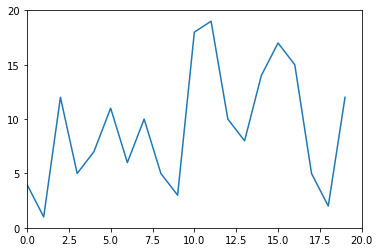

In [23]:
x = np.arange(20) # 0~19
y = np.random.randint(0, 20, 20) # 난수를 20번 생성

plt.plot(x, y)

# y축을 20까지 보이게 하고싶다면?
plt.axis([0, 20, 0, 20])
plt.yticks([0, 5, 10, 15, 20])

plt.show()

# Extra : y축을 20까지 보이게 하고싶다면?, 
#           y축을 '5'단위로 보이게 하고 싶다면?
#.axis(), ytics()

### 산점도 (Scatter Plot)

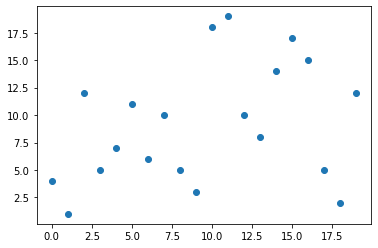

In [24]:
plt.scatter(x, y)
plt.show()

### 박스 그림 (Box Plot)
- 수치형 데이터에 대한 정보 (Q1(25%), Q2(50%), Q3(75%), min, max)

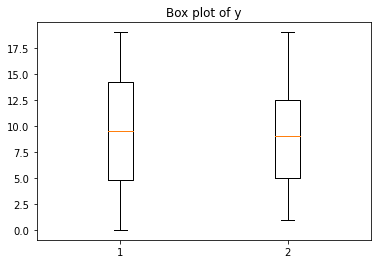

In [28]:
plt.boxplot((x, y))
plt.title('Box plot of y')

plt.show()

# Extra : Plot의 title을 'Box Plot of y'

### 막대 그래프 (Bar Plot)
- 범주형 데이터의 '값'과 그 값의 크기를 직사각형으로 나타낸 그림

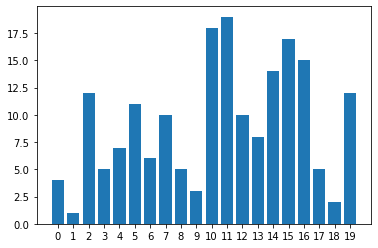

In [30]:
plt.bar(x,y)
plt.xticks(np.arange(0, 20, 1))

plt.show()

# Extra : xticks를 올바르게 처리해봅시다.

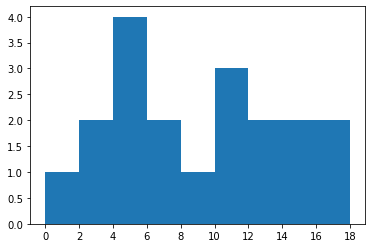

In [33]:
# cf: Histogram
# 도수분표를 직사각형의 막대 형태로 나타냈다.
# '계급'으로 나타낸 것이 특징 : 0, 1, 2가 아니라 0~2까지의 '범주형' 데이터로 구성 후 그림을 그림

plt.hist(y, bins=np.arange(0, 20, 2))
plt.xticks(np.arange(0, 20, 2))

plt.show()

# Extra : xticks를 올바르게 고쳐봅시다.

## 원형 그래프(Pie Chart)

- 데이터에서 전체에 대한 부분의 비율을 부채꼴으로 나타낸 그래프
- 다른 그래프에 비해서 비율 확인에 용이
- `.pie()`

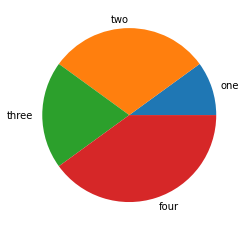

In [35]:
z = [100, 300, 200, 400]

plt.pie(z, labels=['one', 'two', 'three', 'four'])
plt.show()

## IV. The 멋진 그래프, Seaborn Case Study

### Matplotlib를 기반으로 더 다양한 시각화 방법을 제공하는 라이브러리

- 커널밀도그림
- 카운트그림
- 캣그림
- 스트립그림
- 히트맵

### Seaborn import하기

In [36]:
import seaborn as sns

### 커널밀도그림 (Kernel Density Plot)
- 히스토그램과 같은 연속적인 분포를 곡선화해서 그린 그림
- sns.kdeplot()

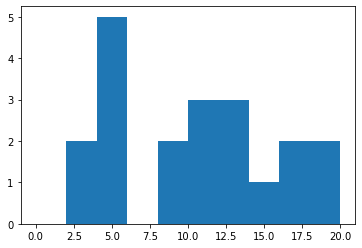

In [37]:
# in Histogram

x = np.arange(0, 22, 2)
y = np.random.randint(0, 20, 20)

plt.hist(y, bins=x)
plt.show()

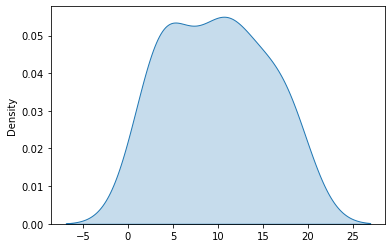

In [39]:
# kdeplot

sns.kdeplot(y, shade=True)

plt.show()

### 카운트그림 (Count Plot)
- 범주형 cloumn의 빈도수를 시각화 -> Groupby 후의 도수를 하는 것과 동일한 효과
- sns.countplot()

In [40]:
vote_df = pd.DataFrame({'name':['Andy', 'Bob', 'Cat'], 'vote':[True, True, False]})

vote_df

,name,vote
0,Andy,True
1,Bob,True
2,Cat,False


In [41]:
# in matplotlib barplot

vote_count = vote_df.groupby('vote').count()

vote_count

,name
vote,
False,1
True,2


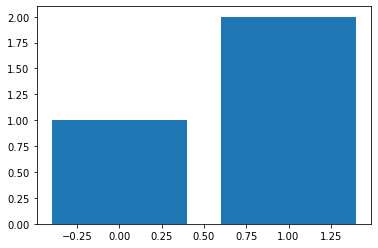

In [42]:
plt.bar(x= [False, True], height=vote_count['name'])

plt.show()

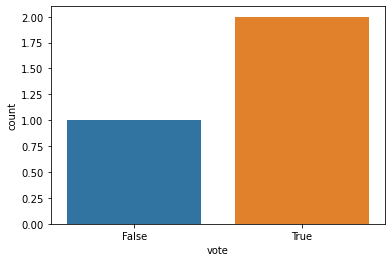

In [43]:
# sns의 countplot

sns.countplot(x=vote_df['vote'])

plt.show()

### 캣그림 (Cat Plot)
- 숫자형 변수와 하나 이상의 범주형 변수의 관계를 보여주는 함수
- sns.catplot()

In [44]:
covid = pd.read_csv('./country_wise_latest.csv')

covid.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


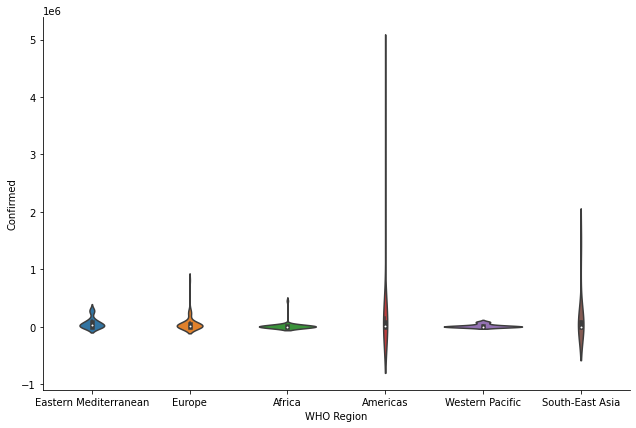

In [47]:
s = sns.catplot(x='WHO Region', y='Confirmed', data=covid, kind='violin')
s.fig.set_size_inches(10, 6)
plt.show()

### 스트립그림 (Strip Plot)
- scatter plot과 유사하게 데이터의 수치를 표현하는 그래프
- `sns.stripplot()`

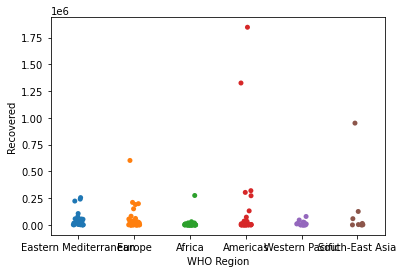

In [48]:
s = sns.stripplot(x='WHO Region', y='Recovered', data=covid)

plt.show()

### 히트맵 (Heat map)
- 데이터의 행렬을 색상으로 표형해주는 그래프
- `sns.heatmap()`

In [49]:
# 히트맵 예제

covid.corr()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase
Confirmed,1.000000,0.934698,0.906377,0.927018,0.909720,0.871683,0.859252,0.063550,-0.064815,0.025175,0.999127,0.954710,-0.010161
Deaths,0.934698,1.000000,0.832098,0.871586,0.806975,0.814161,0.765114,0.251565,-0.114529,0.169006,0.939082,0.855330,-0.034708
Recovered,0.906377,0.832098,1.000000,0.682103,0.818942,0.820338,0.919203,0.048438,0.026610,-0.027277,0.899312,0.910013,-0.013697
Active,0.927018,0.871586,0.682103,1.000000,0.851190,0.781123,0.673887,0.054380,-0.132618,0.058386,0.931459,0.847642,-0.003752
New cases,0.909720,0.806975,0.818942,0.851190,1.000000,0.935947,0.914765,0.020104,-0.078666,-0.011637,0.896084,0.959993,0.030791
New deaths,0.871683,0.814161,0.820338,0.781123,0.935947,1.000000,0.889234,0.060399,-0.062792,-0.020750,0.862118,0.894915,0.025293
New recovered,0.859252,0.765114,0.919203,0.673887,0.914765,0.889234,1.000000,0.017090,-0.024293,-0.023340,0.839692,0.954321,0.032662
Deaths / 100 Cases,0.063550,0.251565,0.048438,0.054380,0.020104,0.060399,0.017090,1.000000,-0.168920,0.334594,0.069894,0.015095,-0.134534
Recovered / 100 Cases,-0.064815,-0.114529,0.026610,-0.132618,-0.078666,-0.062792,-0.024293,-0.168920,1.000000,-0.295381,-0.064600,-0.063013,-0.394254
Deaths / 100 Recovered,0.025175,0.169006,-0.027277,0.058386,-0.011637,-0.020750,-0.023340,0.334594,-0.295381,1.000000,0.030460,-0.013763,-0.049083


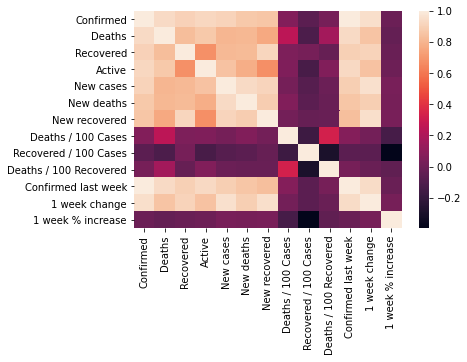

In [51]:
sns.heatmap(covid.corr())

plt.show()

## Mission:

### 